### 1. Importing The Packages

Importing The Warnings Library to suppress warnings

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

### 2. Loading The Data

In [3]:
df = pd.read_csv("./Data/predict_data.csv")
print(df.shape)

df.head()

(14606, 64)


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


### 3. Cleaning The Data.

In [4]:
# Dropping all the columns which has the name Unnamed in it
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.shape

(14606, 63)

### 4. Exploratory Data Analysis

In [5]:
# Making a copy of the dataframe
copied = df.copy()

# Dropping the columns which has more than 50% of missing values
for column in copied.columns:
    if (copied[column].isnull().sum() / len(copied)) * 100 > 50:
        copied.drop(column, axis=1, inplace=True)

copied.shape

(14606, 63)

### 5. Splitting the Data into Features and Target

In [6]:
df = df.drop(columns=['id'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X.shape

(14606, 61)

In [7]:
# Now testing the value counts of the target variable
df['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

### 6. Over Sampling The Data

The data set contains only two classes, i.e either the customer churns or not. This data is highly imbalanced as the count of True is 1419 and False is 13187. So we will use the `SMOTE Technique` to balance the data. We balance the data using minority class as the target class and finally store the balanced data count in the form of a dictionary.

In [8]:
# The data is highly imbalanced. We will use SMOTE to balance the data

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Now inside the ndarray we find the count of the target variable and   
unique, counts = np.unique(y_sm, return_counts=True)

count = dict(zip(unique, counts))
count

{0: 7509, 1: 7509}

### 7. Splitting the Data into Training and Testing

We will split the data into training and testing data using the `train_test_split` method. The random_state is set to 42 to ensure the same split every time the code is run. The test size is set to 0.25 which means 25% of the data will be used for testing and 75% of the data will be used for training.

In [9]:
# Data Set Splitting.
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

### 8. Building the Model using `Random Forest Classifier`

A `random forest` is a `supervised learning` algorithm which means that you must provide the algorithm with a set of features, as well as the outcome that you’re trying to predict, in our case `churn`.

The way it makes predictions is by building a set of `decision trees` on different samples of the data and by taking a majority vote to decide what prediction to make.

In [10]:
# Now using the Random Forest Classifier

classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

### 9. Storing the Predictions in Data Frame

In [11]:
# Now I will make a new DataFrame which will have the y_test and y_pred values

res_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

res_df

,y_test,y_pred
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
3750,0,0
3751,0,0
3752,0,0
3753,0,0


### 10. Evaluation Matrices

The `confusion Matrix` is used to evaluate the model. The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

The confusion matix is a 2 x 2 matrix that contains 4 values: `True Positive`, `True Negative`, `False Positive`, and `False Negative`, and it is plotted using the `heatmap`.

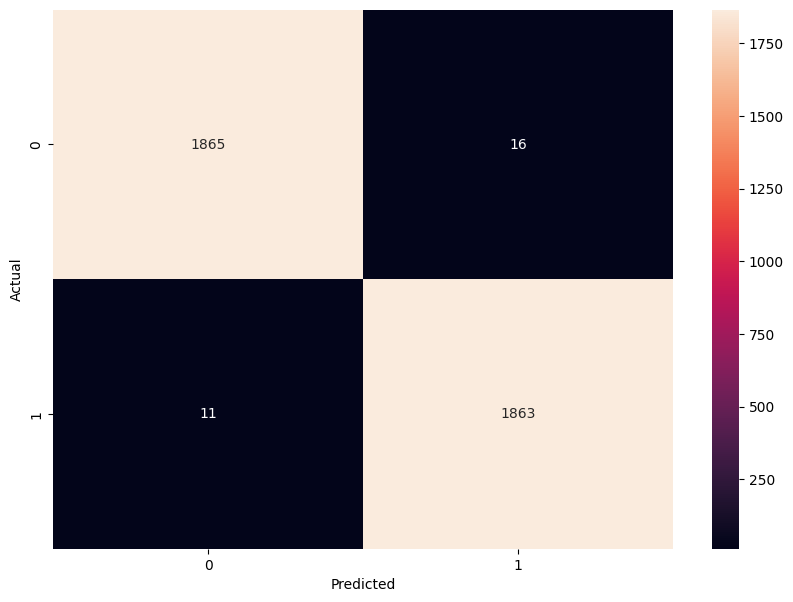

In [12]:
# Now finding the confusion matrix in the form of heatmap

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

`Accuracy` is the ratio of correctly predicted observation to the total observations. It is used to measure the performance of the model and is defined as `TP+TN/TP+FP+FN+TN`

`Precision` is the ratio of correctly predicted positive observations to the total predicted positive observations. It is defined as `TP/TP+FP`

`Recall`, also called as `Sensitivity`, is the ratio of correctly predicted positive observations to the all observations in actual class. It is defined as `TP/TP+FN`

In [13]:
# Now finding the accuracy, precision, recall and f1 score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.9928095872170439
Precision:  0.9914848323576371
Recall:  0.9941302027748132


`f1 score` is the weighted average of Precision and Recall. It is defined as `2*(Recall * Precision) / (Recall + Precision)`

f1 score is the harmonic mean of precision and recall and ranges from 0 to 1. It is used to measure the model's accuracy.

In [14]:
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

F1 Score:  0.9928057553956834
